<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Zadanie" data-toc-modified-id="Zadanie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Zadanie</a></span><ul class="toc-item"><li><span><a href="#Na-początku-wczytaj-dane-data/height.csv" data-toc-modified-id="Na-początku-wczytaj-dane-data/height.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Na początku wczytaj dane <i>data/height.csv</i></a></span></li><li><span><a href="#Narysuj-wykres-wysokości-w-czasie" data-toc-modified-id="Narysuj-wykres-wysokości-w-czasie-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Narysuj wykres wysokości w czasie</a></span></li><li><span><a href="#Z-pierwszego-i-ostatniego-punktu-wyznacz-równanie-prostej-na-podstawie-poniższych-wzorów" data-toc-modified-id="Z-pierwszego-i-ostatniego-punktu-wyznacz-równanie-prostej-na-podstawie-poniższych-wzorów-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Z pierwszego i ostatniego punktu wyznacz równanie prostej na podstawie poniższych wzorów</a></span></li></ul></li><li><span><a href="#Składamy-regresję-liniową." data-toc-modified-id="Składamy-regresję-liniową.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Składamy regresję liniową.</a></span><ul class="toc-item"><li><span><a href="#Implementacja-równania-regresji-liniowej-w-następującej-kolejności:" data-toc-modified-id="Implementacja-równania-regresji-liniowej-w-następującej-kolejności:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implementacja równania regresji liniowej w następującej kolejności:</a></span></li><li><span><a href="#Zadanie-Narysuj-wykres-regresji-liniowej" data-toc-modified-id="Zadanie-Narysuj-wykres-regresji-liniowej-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Zadanie Narysuj wykres regresji liniowej</a></span></li><li><span><a href="#Współczynnik-determinacji" data-toc-modified-id="Współczynnik-determinacji-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Współczynnik determinacji</a></span></li><li><span><a href="#Wykres-reszt" data-toc-modified-id="Wykres-reszt-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Wykres reszt</a></span></li></ul></li></ul></div>

# Prosty przykład regresji liniowej

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Zadanie
### Na początku wczytaj dane <I>data/height.csv</I>

In [2]:
df = pd.read_csv("data/height.csv")

In [3]:
df.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [6]:
df.shape

(15, 1)

### Narysuj wykres wysokości w czasie

In [30]:
# Naszym 'czasem' jest indeks
# Biblioteki do ML przyjmują dane w postaci NumPy; może dokonać sobie konwersji z DataFrames
heightArr = df["Height"].to_numpy()
heightArr

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

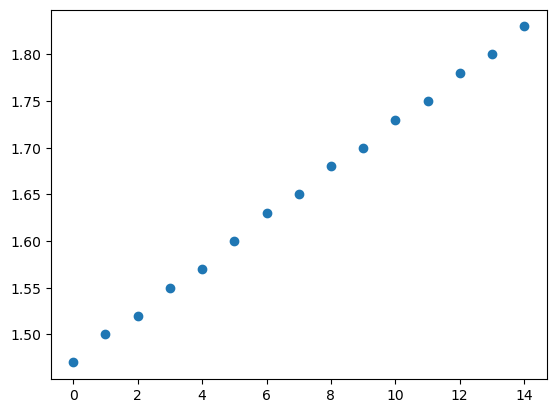

In [31]:
plt.plot(heightArr, linestyle='none', marker='o')
plt.show()

### Z pierwszego i ostatniego punktu wyznacz równanie prostej na podstawie poniższych wzorów

\begin{align*}
a = \frac{y_B-y_A}{x_B-x_A} \\
b = y_A-ax_A\\
\\
\text{A,B - skrajne punkty o współrzędnych (x,y)} \\
\text{a - slope} \\
\text{b - intercept} \\
\end{align*}

In [26]:
A = (0, heightArr[0])
A

(0, 1.47)

In [13]:
heightArr.size-1

14

In [27]:
B = (heightArr.size-1, heightArr[heightArr.size-1])
B

(14, 1.83)

In [25]:
print(f"A = {A}, B = {B}")

A = (0, 1.47), B = (14, 1.83)


In [32]:
a = ((B[1] - A[1]) / (B[0] - A[0]))
a

0.02571428571428572

In [33]:
b = A[1]-a*A[0]
b

1.47

In [37]:
print("a = {0:.3f}, b = {1}".format(a,b))

a = 0.026, b = 1.47


In [35]:
def linear_function(a,b,x):
    """Funkcja liniowa"""
    return a*x + b

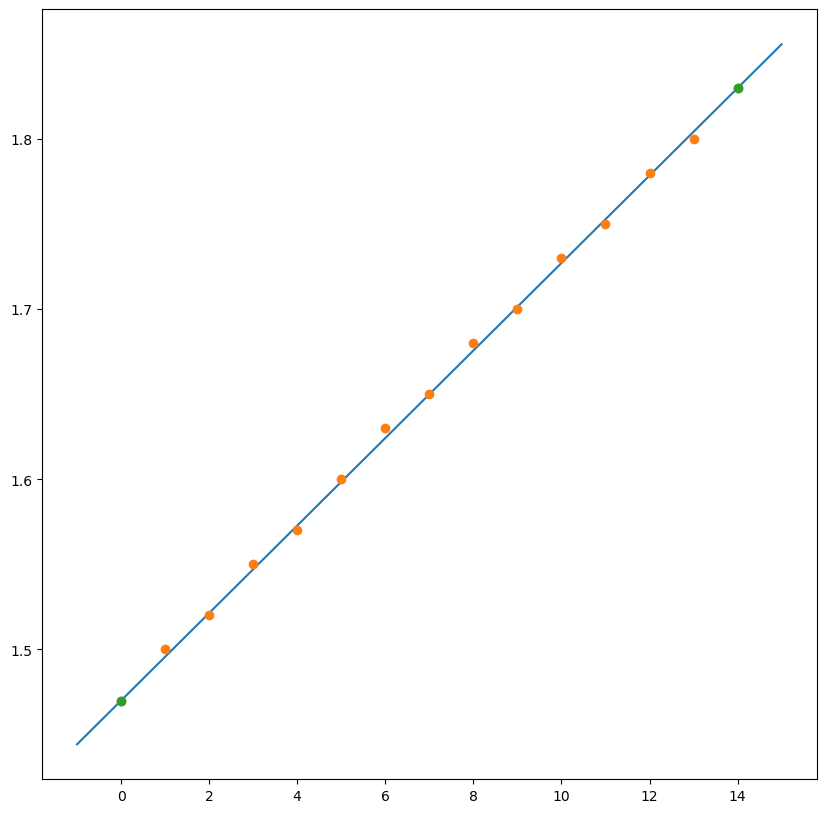

In [36]:
#rysujemy wykres funkcji
fig = plt.figure(figsize = (10,10))
xDraw = np.arange(math.floor(A[0]) -1, math.ceil(B[0]) + 2)
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(heightArr, linestyle = 'none', marker = 'o')
plt.plot([A[0], B[0]], [A[1], B[1]], linestyle= 'none', marker = 'o', markersize=6)
plt.show()

## Składamy regresję liniową.
Współczynnik kierunkowy (slope)
\begin{align*}
a = \frac{\sum_{k=1}^n(x_i-x_{mean})(y_i-y_{mean})}{\sum_{k=1}^n(x_i-x_{mean})^2} \\
x_i\text{ - wartość współrzędnej x kolejnych punktów} \\
y_i\text{ - wartość współrzędnej y kolejnych punktów} \\
x_{mean}\text{ - średnia wartość współrzędnej x wszystkich punktów} \\
y_{mean}\text{ - średnia wartość współrzędnej y wszystkich punktów}
\end{align*}  
\
Współczynnik przesunięcia (intercept)
\begin{equation*}
b = y_{mean}-ax_{mean}
\end{equation*} 

### Implementacja równania regresji liniowej w następującej kolejności:
1. Średnia x
2. Średnia y
3. Wektor różnicy x od średniej x
4. Wektor różnicy y od średniej y
5. Kwadrat 3
6. Iloczyn 3 i 4
7. Suma 6
8. Suma 5
9. Współczynnik slope
10. Współczynnik intercept

In [39]:
y = heightArr
x = np.arange(0, heightArr.size ,1)
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (15,)
y.shape (15,)


In [40]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [41]:
y

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

In [42]:
x_mean = x.mean()
x_mean

7.0

In [43]:
y_mean = y.mean()
y_mean

1.6506666666666665

In [44]:
x_sub = x - x_mean
x_sub

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.])

In [45]:
y_sub = y - y_mean
y_sub

array([-0.18066667, -0.15066667, -0.13066667, -0.10066667, -0.08066667,
       -0.05066667, -0.02066667, -0.00066667,  0.02933333,  0.04933333,
        0.07933333,  0.09933333,  0.12933333,  0.14933333,  0.17933333])

In [46]:
x_sub_times_y_sub = x_sub * y_sub
x_sub_times_y_sub

array([ 1.26466667,  0.904     ,  0.65333333,  0.40266667,  0.242     ,
        0.10133333,  0.02066667, -0.        ,  0.02933333,  0.09866667,
        0.238     ,  0.39733333,  0.64666667,  0.896     ,  1.25533333])

In [47]:
# x_sub_sq = x_sub**2
x_sub_sq = np.square(x_sub)
x_sub_sq

array([49., 36., 25., 16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16., 25.,
       36., 49.])

### Zadanie Narysuj wykres regresji liniowej

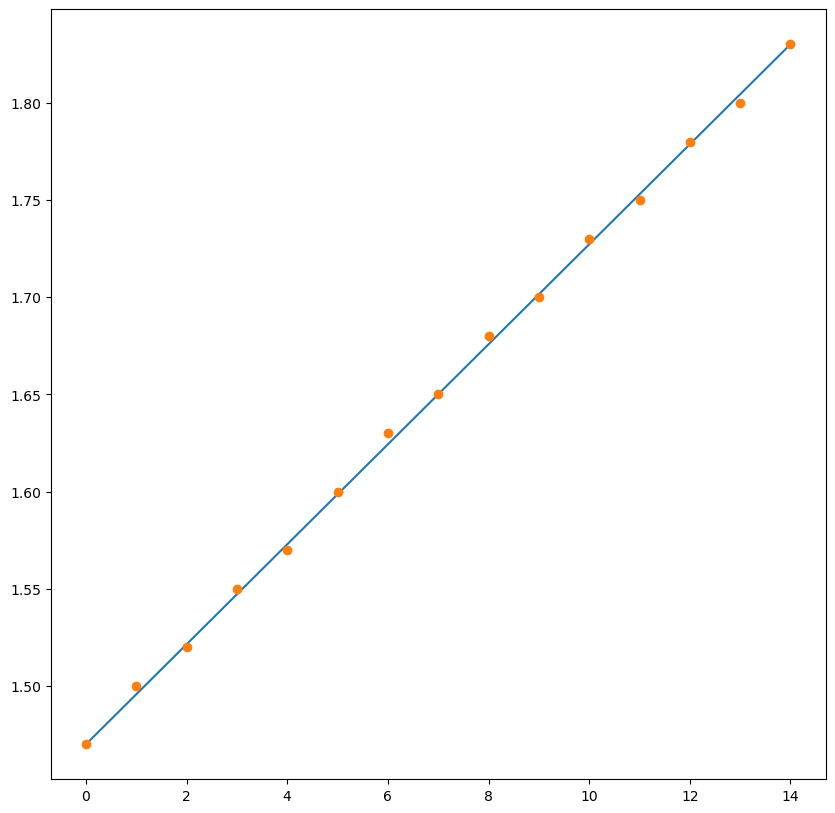

In [49]:
# Wykres powyższej funkcji
fig = plt.figure(figsize = (10,10))
xDraw = x
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(heightArr, linestyle = 'none', marker = 'o')
# plt.plot([A[0], B[0]], [A[1], B[1]], linestyle= 'none', marker = 'o', markersize=6)
plt.show()

### Współczynnik determinacji

\begin{align*}
R^2 = \frac{\sum_{k=1}^n(y_{pred}-y_{mean})^2}{\sum_{k=1}^n(y_{ref}-y_{mean})^2}\\ 
y_{pred}\text{ - wartość przewidywana współrzędnej y na podsatwie modelu regresji liniowej}\\
y_{ref}\text{ - wartość referencyjna współrzędnej y}\\
y_{mean}\text{ - wartość średnia współrzędnej y}\\
\end{align*}


### Wykres reszt